## Wine Recommendation

Analizing the database of wine reviews: [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) 


inspired by [wine-recommender](https://www.kaggle.com/sudhirnl7/wine-recommender/notebook)

### Import and read csv

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

ModuleNotFoundError: No module named 'squarify'

In [2]:
path = 'input/'
path_150k = path + 'winemag-data_first150k.csv'
path_130k = path + 'winemag-data-130k-v2.csv'

wine_150k = pd.read_csv(path_150k)
wine_130k = pd.read_csv(path_130k)

In [3]:
print(wine_150k.shape)
print(wine_130k.shape)

(150930, 11)
(129971, 14)


## Data Cleaning and Analyzing Data

The wine_130k has more columns than wine_150k, but I don't see any problem to concatenate

In [4]:
list(set(wine_130k.columns) - set( wine_150k.columns))

['taster_name', 'taster_twitter_handle', 'title']

In [5]:
wines = pd.concat([wine_130k, wine_150k], axis=0)

In [6]:
wines.rename(columns = {'Unnamed: 0': 'Index_P'}, inplace = True)
wines.head()

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
wines.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index_P,280901.0,NaN,NaN,NaN,70615.70596,41214.379445,0.0,35112.0,70225.0,105337.0,150929.0
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901.0,NaN,NaN,NaN,88.146934,3.151528,80.0,86.0,88.0,90.0,100.0
price,258210.0,NaN,NaN,NaN,34.177162,38.611708,4.0,16.0,25.0,40.0,3300.0
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wines.dtypes

Index_P                    int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

#### Handling Missing Values

In [9]:
missing_val_count_by_column = (wines.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

taster_twitter_handle    182143
taster_name              177174
region_2                 169437
title                    150930
designation               83200
region_1                  46307
price                     22691
country                      68
province                     68
variety                       1
dtype: int64


In [10]:
percent_missing = ((wines.isnull().sum().sum())/np.product(wines.shape)*100)
print(percent_missing)

21.156894625305203


For me it doesn't make sense to deal with priceless neighbors, excludes the empty values of provincial parents and variety for being too small to deal

In [11]:
wines.shape

(280901, 14)

In [12]:
wines.dropna(subset=['price','country', 'province', 'variety'], inplace=True)

In [13]:
wines.shape

(258145, 14)

In [14]:
missing_val_count_by_column = (wines.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

taster_twitter_handle    166645
taster_name              161725
region_2                 147149
title                    137230
designation               77078
region_1                  42352
dtype: int64


### Distribution of Wine Reviews by Top 10 Countries

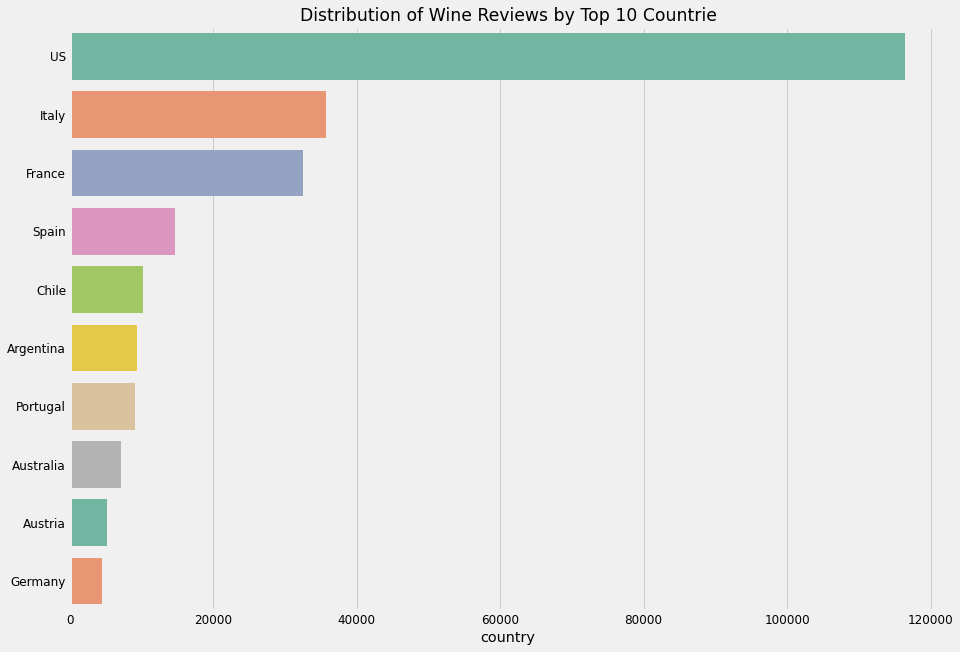

In [16]:
#print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wines['country'].value_counts().to_frame()[0:10]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='Set2',orient='h')
plt.title('Distribution of Wine Reviews by Top 10 Countries');

### Distribution of wine price

Text(0.5, 1.0, 'Distribution of price')

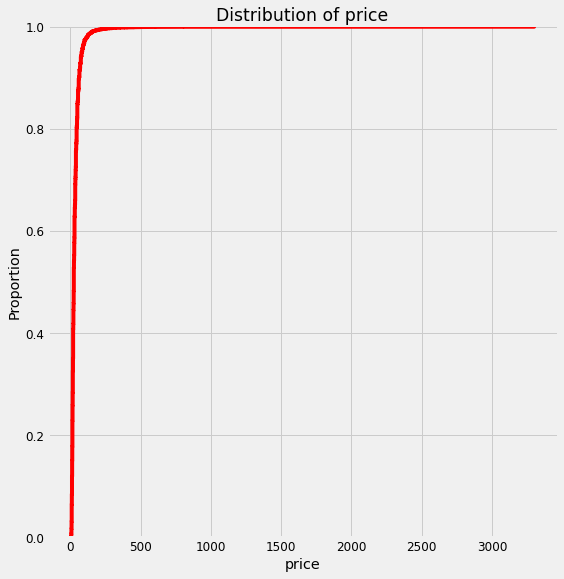

In [17]:
sns.displot(data = wines,color='r', x="price", kind="ecdf", height=8)
plt.title('Distribution of price')

Text(0.5, 1.0, 'Boxplot of price')

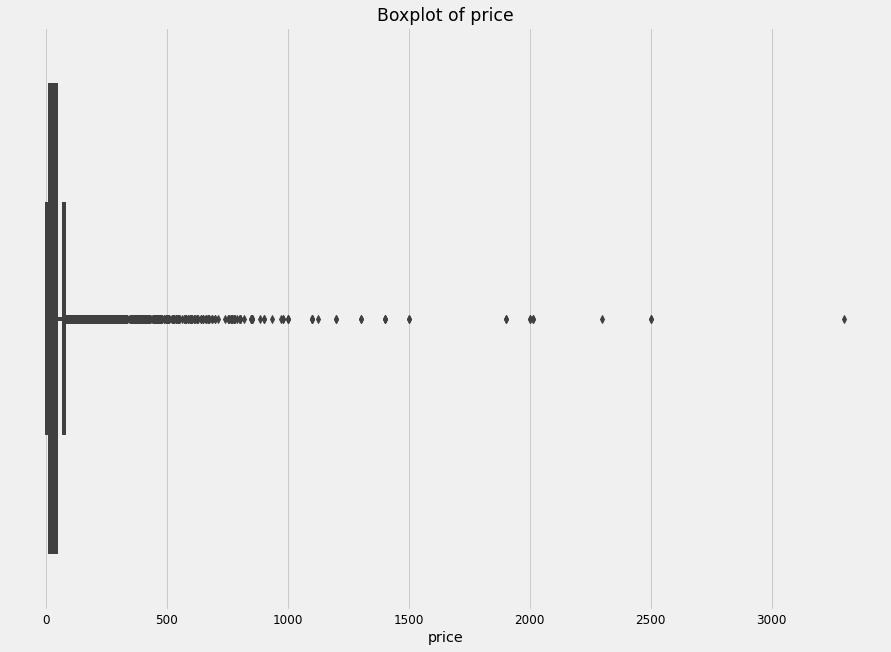

In [18]:
plt.figure(figsize=(14,10))
sns.boxplot(data=wines, x='price')
plt.title('Boxplot of price')

In [19]:
mean_price = 34.179725
std_price = 38.615971
wines['price'].describe()

count    258145.000000
mean         34.179725
std          38.615971
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [20]:
good_price = mean_price + 2*std_price
good_price

111.411667

Text(0.5, 1.0, 'Distribution of price even the good price')

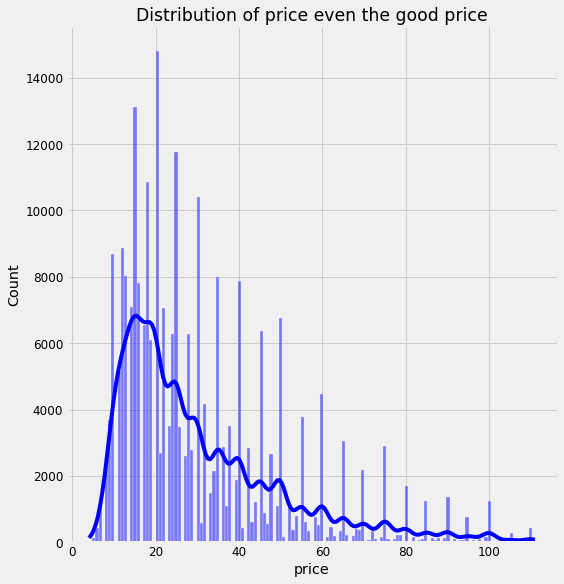

In [21]:
sns.displot(data = wines[wines['price']<good_price],color='b', x="price", kde=True, height=8)
plt.title('Distribution of price with the good price')

Text(0.5, 1.0, 'Distribution of points with the good price')

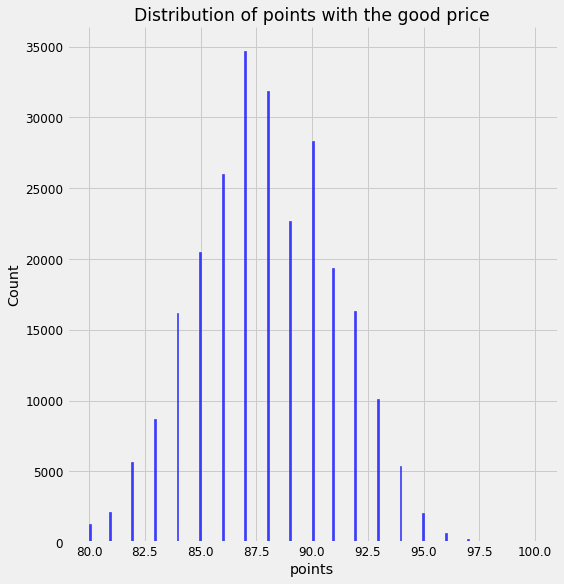

In [62]:
sns.displot(data = wines[wines['price']<good_price],color='b', x="points", height=8)
plt.title('Distribution of points with the good price')

Text(0.5, 1.0, 'Boxplot of price even the good price')

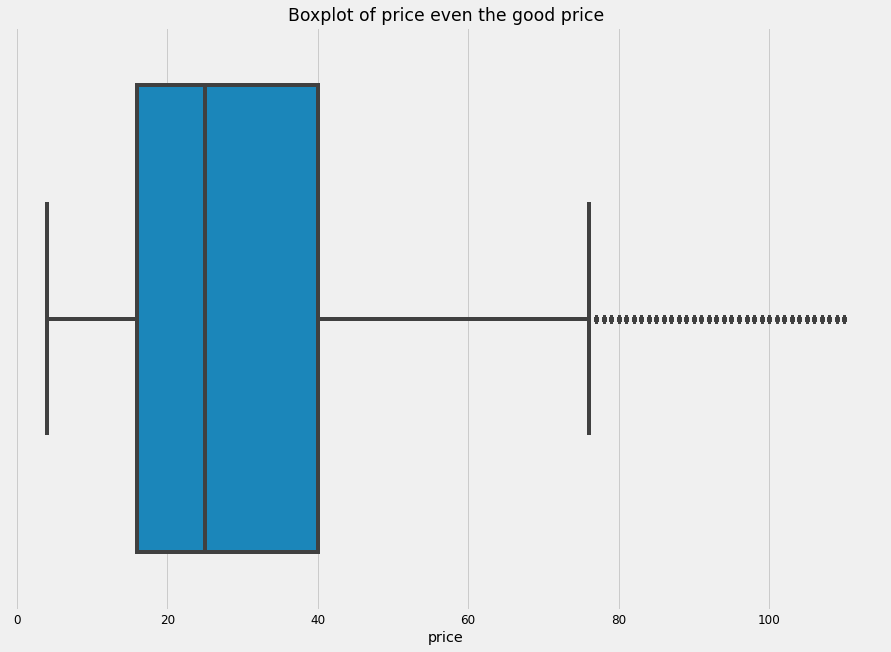

In [22]:
plt.figure(figsize=(14,10))
sns.boxplot(data=wines[wines['price']<111], x='price')
plt.title('Boxplot of price with the good price')

In [33]:
wines_good_price = wines[wines['price']<good_price]

print('{}%'.format(round(wines_good_price.shape[0]/wines.shape[0]*100,2)))

97.75%


### Top 10 Wines (ordered by price with a score equal to or greater than 99)

In [87]:
top_10 = wines_good_price[wines_good_price['points'] >= 99].sort_values(by=['price'],ascending=True)
top_10[:10]

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
118059,118059,US,"Shows classic, full-throttle notes of tropical...",Estate Vineyard,99,44.0,California,Sonoma Coast,Sonoma,NaN,NaN,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla
119196,119196,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse
19354,19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse
19356,19356,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse
119194,119194,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse
84034,84034,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse
84036,84036,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse
47428,47428,US,In a vintage that produced the finest overall ...,En Chamberlin Vineyard,99,75.0,Oregon,Walla Walla Valley (OR),Oregon Other,Paul Gregutt,@paulgwine,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse
47429,47429,US,This expresses the greatness of its vintage an...,Hirsch Vineyard,99,75.0,California,Sonoma Coast,Sonoma,NaN,NaN,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,Williams Selyem
47894,47894,US,"Dark and concentrated, this sends up complex a...",En Chamberlin Vineyard,99,75.0,Oregon,Walla Walla Valley (OR),Oregon Other,Paul Gregutt,@paulgwine,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse


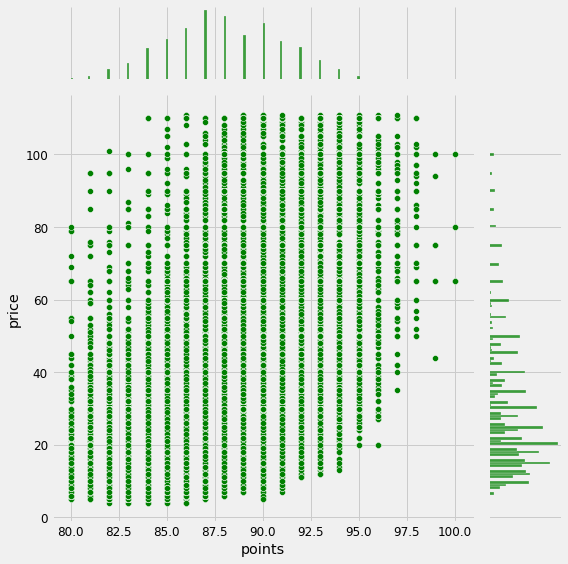

In [72]:
sns.jointplot( x = wines_good_price['points'],y = wines_good_price['price'],color='g', height=8);

In [78]:
cnt = wines_good_price.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='points',ascending= False)[:20]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Oregon,US,100,3,65.000000,65.000000,65.000000
1,California,US,100,2,100.000000,100.000000,100.000000
2,Washington,US,100,2,80.000000,80.000000,80.000000
3,Oregon,US,99,6,65.000000,75.000000,70.000000
4,California,US,99,8,44.000000,100.000000,82.125000
5,Victoria,Australia,98,5,86.000000,97.000000,92.600000
6,Piedmont,Italy,98,3,60.000000,83.000000,71.000000
7,Bordeaux,France,98,2,70.000000,92.000000,81.000000
8,California,US,98,35,52.000000,110.000000,85.000000
9,Washington,US,98,6,50.000000,85.000000,65.833333
